In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
im=cv2.imread('noddy.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape

In [4]:
print(im.shape)

(225, 300, 3)


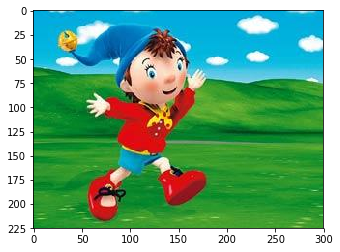

In [5]:
plt.imshow(im)

In [60]:
#Flatten Each Channel of the Image

all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(67500, 3)


In [61]:
from sklearn.cluster import KMeans
import numpy as np

In [74]:
dominant_colors=50

km=KMeans(n_clusters=dominant_colors)

In [75]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
centers=km.cluster_centers_

In [77]:
centers=np.array(centers,dtype='uint8')

In [78]:
#plot what all colors are these?

ValueError: cannot reshape array of size 3 into shape (100,100,3)

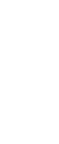

In [90]:
i=1

plt.figure(0,figsize=(4,2))

colors=[]
for each_col in centers:
    plt.subplot(1,10,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Swatch color
    
    a=np.zeros((100,100,3),dtype='int8')
    
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()
    

Segment our Original image


In [80]:
new_img=np.zeros((225*300,3),dtype='uint8')
print(new_img.shape)

(67500, 3)


In [81]:
km.labels_

array([ 2,  2,  2, ..., 32, 32, 32])

In [82]:
colors

[array([246, 251, 250], dtype=uint8),
 array([ 47, 156,  53], dtype=uint8),
 array([  1, 173, 220], dtype=uint8),
 array([222,  13,  18], dtype=uint8),
 array([229, 169, 141], dtype=uint8),
 array([70, 19, 11], dtype=uint8),
 array([ 79, 198, 227], dtype=uint8),
 array([ 30, 145,  44], dtype=uint8),
 array([  3, 108, 174], dtype=uint8),
 array([142,  29,  24], dtype=uint8),
 array([ 97, 151,  96], dtype=uint8),
 array([ 91, 171,  53], dtype=uint8),
 array([244, 215, 191], dtype=uint8),
 array([35, 54, 54], dtype=uint8),
 array([  5, 115,  39], dtype=uint8),
 array([178, 239, 249], dtype=uint8),
 array([159, 122,  94], dtype=uint8),
 array([240, 195,  61], dtype=uint8),
 array([ 87, 181, 187], dtype=uint8),
 array([ 69, 161,  49], dtype=uint8),
 array([133,  78,  46], dtype=uint8),
 array([21, 16, 12], dtype=uint8),
 array([  8,  83, 134], dtype=uint8),
 array([ 2, 90, 27], dtype=uint8),
 array([211, 146, 117], dtype=uint8),
 array([171,  36,  23], dtype=uint8),
 array([77, 89, 99], dty

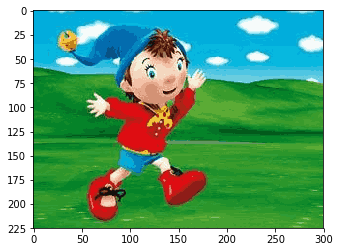

In [83]:
for ix in range(new_img.shape[0]):
    temp=km.labels_[ix]
    new_img[ix]=colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()